In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Display Training & Test data (top & bottom five datasets)

In [3]:
#load the csv file
train_data = pd.read_csv('train_data_preprocessed_v3.csv')
test_data = pd.read_csv('test_data_preprocessed_v3.csv')

In [4]:
train_data.shape

(63874, 55)

In [5]:
test_data.shape

(9043, 55)

In [6]:
train_data.head()

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3,y
0,29,42,0,0,1,0,1,0,0,0,...,0,-0.710220,0.556372,-1.832544,5.809419,-0.531878,0.087504,1.789912,-1.279360,1
1,15,50,0,0,1,0,1,0,0,0,...,0,-0.605846,0.556372,0.243524,-0.011872,-0.531878,0.840223,-0.015243,-0.665628,1
2,5,47,0,0,1,0,1,0,0,0,...,0,-0.440095,0.556372,-1.201884,3.516911,-0.531878,0.574884,-1.294733,-1.277750,1
3,16,39,0,1,0,0,1,0,0,0,...,0,-0.154512,0.556372,-1.240974,-0.724921,-0.531878,-0.177147,0.095431,-0.473078,1
4,30,30,1,0,0,0,1,0,1,0,...,0,-0.463407,0.556372,-0.033302,-0.011872,-0.531878,-1.022643,1.883206,-0.257505,0


In [7]:
test_data.head()

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3,y
0,14,48,0,0,1,0,1,0,0,0,...,0,-0.353943,0.46161,0.033731,-0.811596,-0.435061,0.669934,-0.213638,-0.403107,1
1,22,31,0,1,0,0,1,0,0,1,...,0,3.367438,0.46161,-0.425208,-0.170094,-0.435061,-0.939981,0.705061,-0.159961,1
2,9,45,0,0,1,0,1,0,0,0,...,0,-0.112356,0.46161,-0.002151,-0.811596,-0.435061,0.399123,-0.819273,-0.508545,1
3,20,58,0,0,0,1,1,0,0,0,...,0,0.064959,0.46161,-1.512344,0.322148,-0.435061,1.600722,0.529756,-0.483361,1
4,21,35,0,1,0,0,1,0,0,0,...,0,1.839344,0.46161,2.413680,-0.170094,-0.435061,-0.565282,0.593416,-0.191371,0


In [8]:
#creating X,Y train and test data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

In [9]:
### Checking Training Data and Testing Data dimensions
count_train = np.unique(y_train, return_counts=True)  # np.unique: numpy, find the unique elements of an array
count_test = np.unique(y_test, return_counts=True)

## DTs for Classification

In [10]:
from sklearn import tree
from sklearn import metrics

In [11]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

In [12]:
y_pred = clf.predict(x_test)
print("Accuracy of the Decision Tree with processed Data:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the Decision Tree with processed Data: 0.6602897268605551


## Hyperparameter Tuning
### Next we try to tune the maximum depth of the tree to decide the optimal maximum depth of the tree that gives the highest accuracy

In [13]:
Accu =[]  # This will store accuracy for different depth, [] define an empty list
for k in range(1,20): # k is depth of tree, starting from 1 to 10
    clf = tree.DecisionTreeClassifier(max_depth = k)
    # Train Decision Tree Classifer
    clf = clf.fit(x_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(x_test)
    accuracy_k =  metrics.accuracy_score(y_test, y_pred)
    Accu.append(accuracy_k) 
    print("Dept=", k)
    print("Accuracy:\n",accuracy_k)
    print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
    print("\n")    

Dept= 1
Accuracy:
 0.4749530023222382
Confusion Matrix: [[1000   58]
 [4690 3295]]


Dept= 2
Accuracy:
 0.753621585756939
Confusion Matrix: [[ 643  415]
 [1813 6172]]


Dept= 3
Accuracy:
 0.6796417118212983
Confusion Matrix: [[ 920  138]
 [2759 5226]]


Dept= 4
Accuracy:
 0.5304655534667698
Confusion Matrix: [[ 984   74]
 [4172 3813]]


Dept= 5
Accuracy:
 0.7061815769103174
Confusion Matrix: [[ 921  137]
 [2520 5465]]


Dept= 6
Accuracy:
 0.71900917837001
Confusion Matrix: [[ 893  165]
 [2376 5609]]


Dept= 7
Accuracy:
 0.6834015260422426
Confusion Matrix: [[ 792  266]
 [2597 5388]]


Dept= 8
Accuracy:
 0.7119318810129381
Confusion Matrix: [[ 768  290]
 [2315 5670]]


Dept= 9
Accuracy:
 0.6962291275019352
Confusion Matrix: [[ 687  371]
 [2376 5609]]


Dept= 10
Accuracy:
 0.6794205462788897
Confusion Matrix: [[ 737  321]
 [2578 5407]]


Dept= 11
Accuracy:
 0.6655976998783589
Confusion Matrix: [[ 729  329]
 [2695 5290]]


Dept= 12
Accuracy:
 0.6753289837443326
Confusion Matrix: [[ 712  3

In [14]:
# List of accuracy from max_depth = 1 to 20
Accu

[0.4749530023222382,
 0.753621585756939,
 0.6796417118212983,
 0.5304655534667698,
 0.7061815769103174,
 0.71900917837001,
 0.6834015260422426,
 0.7119318810129381,
 0.6962291275019352,
 0.6794205462788897,
 0.6655976998783589,
 0.6753289837443326,
 0.6606214751741679,
 0.6640495410814995,
 0.6586309852924914,
 0.6477938737144753,
 0.6452504699767776,
 0.663828375539091,
 0.651221939621807]

Text(0, 0.5, 'Accuracies')

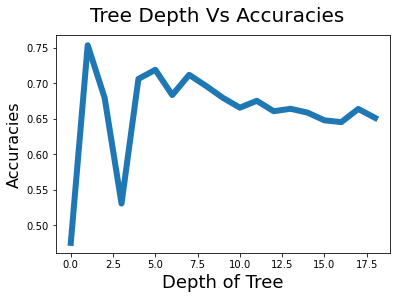

In [15]:
# Plot the relationship graphs
fig = plt.figure()
plt.plot(Accu, linewidth=6)
fig.suptitle('Tree Depth Vs Accuracies', fontsize=20)
plt.xlabel('Depth of Tree', fontsize=18)
plt.ylabel('Accuracies', fontsize=16)

In [16]:
#Maximum accuracy
print('Maximum depth value with the highest accuracy: ',1 + Accu.index(max(Accu)))
print('Maximum Accuracy:',"%.4f" % max(Accu))

Maximum depth value with the highest accuracy:  2
Maximum Accuracy: 0.7536


In [17]:
# Final Model
clf = tree.DecisionTreeClassifier(max_depth = 1 + Accu.index(max(Accu)))

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

## Model Evaluation

In [18]:
#Plot Tree
fig, ax = plt.subplots(figsize=(200, 200))
tree.plot_tree(clf, fontsize=60)
plt.show()

### Training Performance

In [19]:
# Cross Validation Method - 10 folds validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % max(Accu))  # keep 4 decimal placce

cv_score = cross_val_score(clf, x_train, y_train, cv=10)
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

OOB_SCORE= 0.7536
[0.67 0.73 0.76 0.75 0.75 0.76 0.77 0.76 0.77 0.77]
Ten-fold Cross Validation Score= 0.7499


### Testing Performance

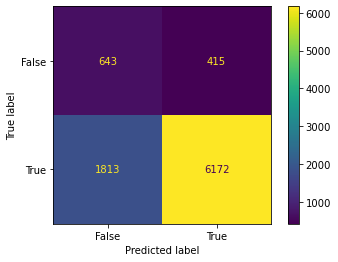

In [20]:
#Confusion Metrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [21]:
# Metrics evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy of the Decision Tree with Max_Depth = %i: %f" % (1 + Accu.index(max(Accu)),max(Accu)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of the Decision Tree with Max_Depth = 2: 0.753622
[[ 643  415]
 [1813 6172]]
              precision    recall  f1-score   support

           0       0.26      0.61      0.37      1058
           1       0.94      0.77      0.85      7985

    accuracy                           0.75      9043
   macro avg       0.60      0.69      0.61      9043
weighted avg       0.86      0.75      0.79      9043

